In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# tips 데이터셋 로드 
tips = sns.load_dataset('tips')
tips

1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [ ]:
# 컬럼의 이름을 변경
tips.columns = ["총금액", '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips.head(1)

In [ ]:
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)

In [ ]:
# 팁의 비율 파생변수 생성
# 팁 / 총금액 * 100
tips['팁 비율'] = tips['팁'] / tips['총금액'] * 100

In [ ]:
tips.head(1)

In [ ]:
# 그룹화
group_data = tips[['인원', '성별', '팁 비율']].groupby(['인원', '성별']).mean()

In [ ]:
# 시각화
import matplotlib.pyplot as plt

In [ ]:
group_data.plot.bar()

In [ ]:
import platform

In [ ]:
# 그래프에서 한글 깨짐 방지 
if platform.system() == "Darwin":    # MAC 인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [ ]:
group_data.index

In [ ]:
x = list(range(0, len(group_data.index), 1))
y = group_data['팁 비율']

# print(x)
# print(y)
plt.barh(x, y, label='팁 비율')
plt.yticks(x, group_data.index)
plt.legend()
plt.show()


In [62]:
group_data

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [52]:
# 남자의 데이터프레임
# 여자의 데이터프레임 으로 나눈다. 
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else:
        female_data = pd.concat([female_data, group_data.loc[[i]]])

In [63]:
male_data

,,팁 비율
인원,성별,
1,Male,22.093023
2,Male,16.273796
3,Male,14.763093
4,Male,15.017047
5,Male,13.371547
6,Male,14.953486


In [70]:
list(range(2, len(female_data)*2, 2))

[2, 4, 6, 8, 10]

In [ ]:
x = list(range(1, len(male_data)*2, 2))
y = male_data['팁 비율']
x2 = list(range(2, (len(female_data)+1)*2, 2))
y2 = female_data['팁 비율']
plt.bar(x, y, width=0.4)
plt.bar(x2, y2, width=0.4)
plt.show()

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다. 

In [76]:
pivot_data = pd.pivot_table(
    tips, 
    index = '인원', 
    columns = '성별', 
    values = ['팁 비율'], 
    aggfunc = 'mean'
)

<AxesSubplot: xlabel='인원'>

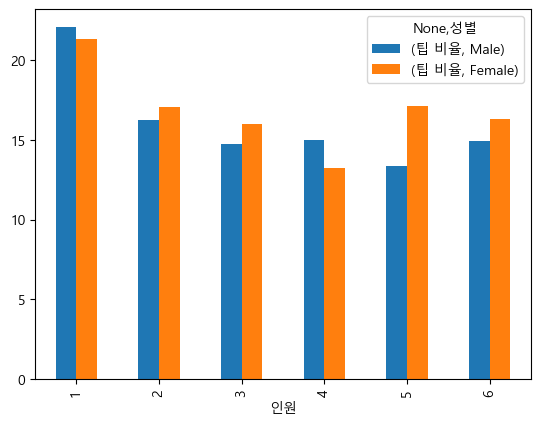

In [77]:
pivot_data.plot.bar()